In [1]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms= 0.3
class_names = []
with open("coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]

img = cv2.imread("/content/ppl_img.jpg")

Time taken to detect all the objects:  6.958 seconds


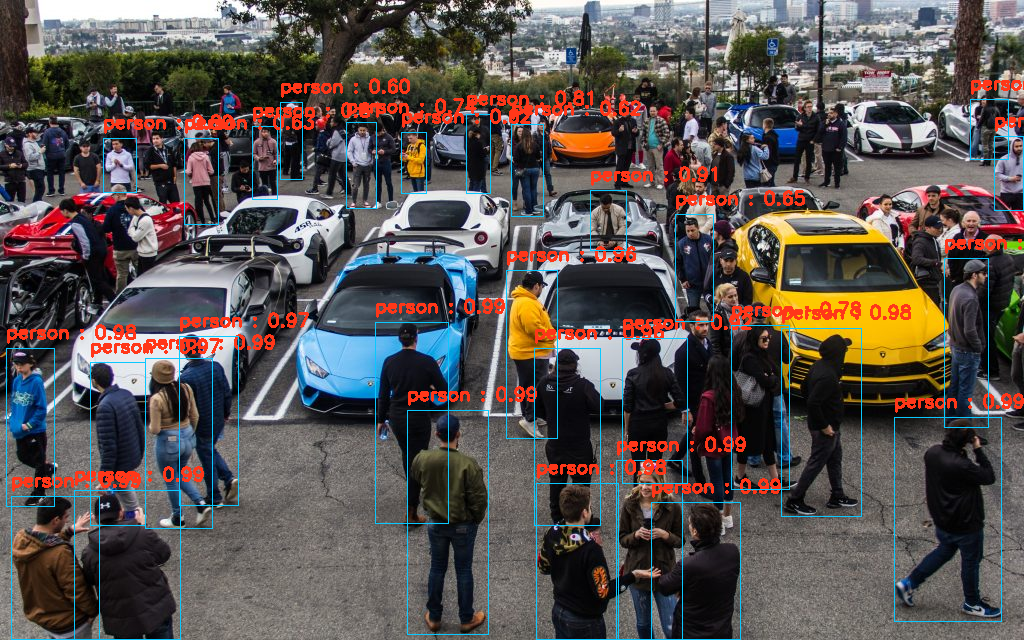

In [2]:
arc = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y = time.time()
print("Time taken to detect all the objects: ", "{:.3f} seconds".format(y-x))
for (classid, score, box) in zip(classes, scores, boxes):
  label = "%s : %.2f" % (class_names[classid],score)
  # print(label)
  if class_names[classid]=="person":
    cv2.rectangle(img,box,color=(255, 200, 10),thickness=1)
    cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)
cv2_imshow(img)